# Data Visualisation - Milestone 1 Notebook

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## 1. Dataset

## 2. Problematic

## 3. Exploratory Data Analysis

Pre-processing of the data set you chose:

- Show some basic statistics and get insights about the data


### 3.1 Covid-19 Current Situation

In [4]:
PATH_COVID_SITUATION = os.path.expanduser('~/Documents/GitHub/com-480-project-pouletpanier/data/COVID-19-geographic-disbtribution-worldwide.xlsx')

In [7]:
covid_situation = pd.read_excel(PATH_COVID_SITUATION)

In [19]:
covid_situation.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
2,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


#### 3.1.1 Total Number of cases and deaths worldwide

In [9]:
number_cases = covid_situation['cases'].sum()

In [11]:
number_deaths = covid_situation['deaths'].sum()

In [15]:
last_date = covid_situation['dateRep'][0]

In [18]:
print(f'The total number of cases due to the COVID-19 worldwide until {last_date.date()} is {number_cases} and the total number of deaths is {number_deaths}')

The total number of cases due to the COVID-19 worldwide until 2020-03-31 is 777798 and the total number of deaths is 37272


#### 3.1.2 Total Number of cases and deaths per Country 

- we can add also the statistics for continents and also the pourcentage of the population that is infected by the COVID-19

In [32]:
cases_per_country = covid_situation.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False)

In [33]:
cases_per_country.head(10)

countriesAndTerritories
United_States_of_America    164620
Italy                       101739
Spain                        85195
China                        82241
Germany                      61913
France                       44550
Iran                         41495
United_Kingdom               22141
Switzerland                  15412
Belgium                      11899
Name: cases, dtype: int64

In [34]:
deaths_per_country = covid_situation.groupby('countriesAndTerritories')['deaths'].sum().sort_values(ascending=False)

In [35]:
deaths_per_country.head(10)

countriesAndTerritories
Italy                       11591
Spain                        7340
China                        3309
United_States_of_America     3170
France                       3024
Iran                         2757
United_Kingdom               1408
Netherlands                   864
Germany                       583
Belgium                       513
Name: deaths, dtype: int64

#### 3.1.3 Get some plots

- Total number of new cases/deaths by time (daily)
- Total number of cases/deaths by time (daily)

In [37]:
covid_situation_per_day = covid_situation.groupby('dateRep')['cases','deaths'].sum()

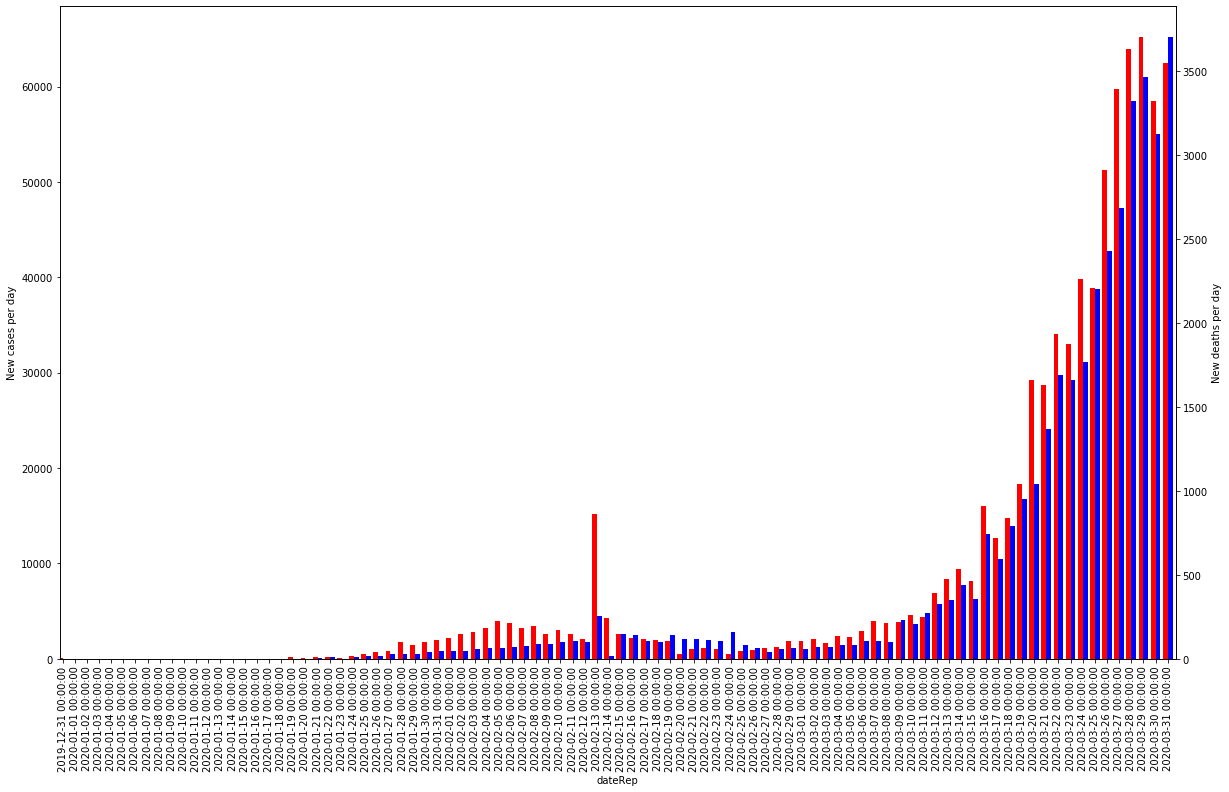

In [49]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

covid_situation_per_day['cases'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
covid_situation_per_day['deaths'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('New cases per day')
ax2.set_ylabel('New deaths per day')

plt.show()

In [52]:
cumulative_covid_situation_per_day = covid_situation_per_day.cumsum()

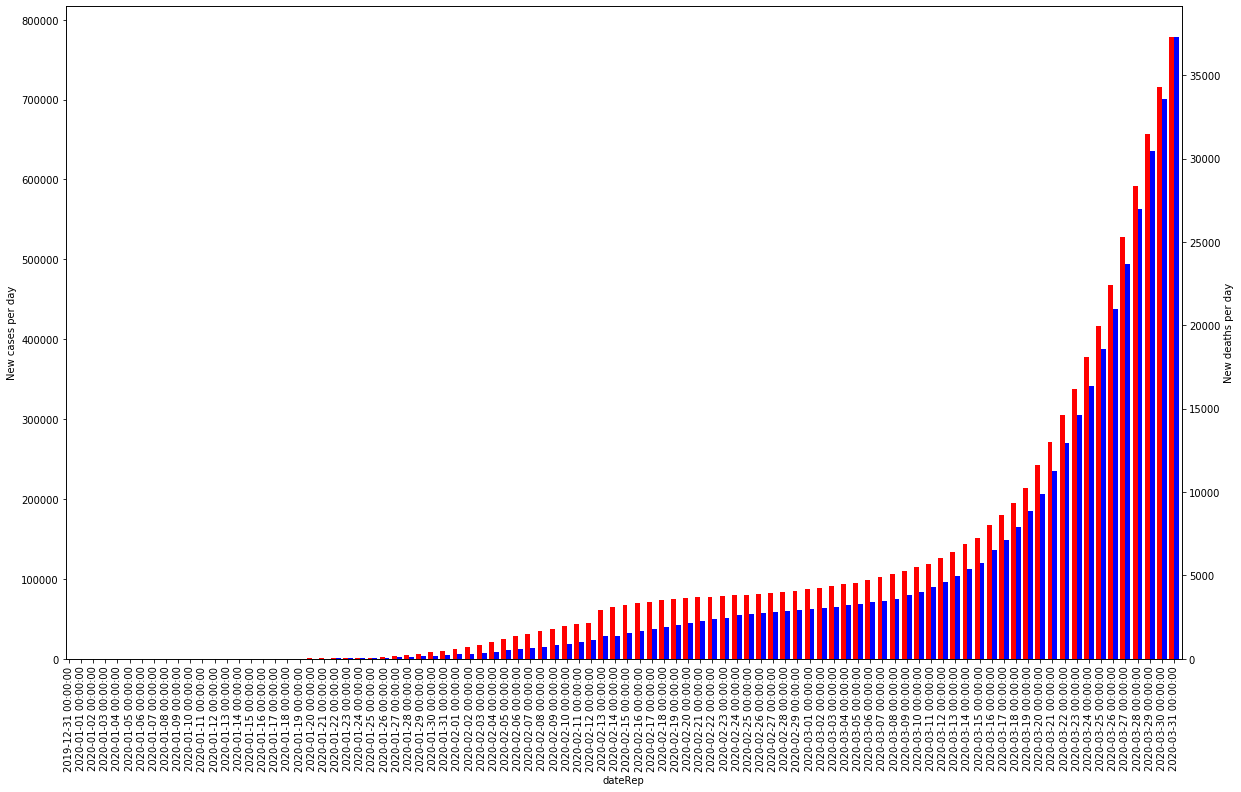

In [53]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(111)
ax2 = ax.twinx()

width = 0.4

cumulative_covid_situation_per_day['cases'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
cumulative_covid_situation_per_day['deaths'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('New cases per day')
ax2.set_ylabel('New deaths per day')

plt.show()

### 3.2 Governements decisions

In [54]:
PATH_GOV_DECISIONS = os.path.expanduser('~/Documents/GitHub/com-480-project-pouletpanier/data/COVID 19 Containment measures data.csv')

In [55]:
gov_decisions = pd.read_csv(PATH_GOV_DECISIONS)

In [56]:
gov_decisions.head()

,ID,Applies To,Country,Date Start,Date end intended,Description of measure implemented,Exceptions,Implementing City,Implementing State/Province,Keywords,Quantity,Source,Target city,Target country,Target region,Target state
0,163,NaN,Austria,"Mar 16, 2020",NaN,On 10 March 2020 government announced that all...,NaN,NaN,NaN,university closure,NaN,https://en.wikipedia.org/wiki/2020_coronavirus...,NaN,NaN,NaN,NaN
1,132,NaN,Germany,"Feb 01, 2020",NaN,"102 German citizens and 26 relatives, all of w...",NaN,NaN,NaN,"international traveller screening, traveller q...",NaN,https://www.tagesschau.de/inland/coronavirus-g...,NaN,NaN,NaN,NaN
2,578,NaN,United Kingdom,"Mar 20, 2020",NaN,"All schools, nurseries and colleges closed.",NaN,NaN,NaN,"nursery schools closure, school closure, unive...",NaN,https://www.theguardian.com/world/2020/mar/18/...,NaN,NaN,NaN,NaN
3,372,NaN,United Kingdom,"Mar 16, 2020",NaN,If one person in any household has a persisten...,NaN,NaN,NaN,"14 days, contact isolation",NaN,https://www.bbc.com/news/uk-51920444,NaN,NaN,NaN,NaN
4,357,NaN,United Kingdom,"Mar 16, 2020",NaN,"By the weekend, those with the most serious he...",NaN,NaN,NaN,isolation advice to elderly,NaN,https://www.bbc.com/news/uk-51920444,NaN,NaN,NaN,NaN


## 4. Related work